<a href="https://colab.research.google.com/github/njy-mbc/Python25Study/blob/main/03_01_k%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# 이번 겨울에는 대방어철로 대방어 주분이 크게 늘어
# MBC마켓에서 업계 최초로 대방어를 무게 단위로 판매하려 함
# 무게 단위로 판매를 하면 가격 측정도 원활하고
# 고객도 합리적으로 판단을 할 수 있다

# 농어의 무게를 재측정해야 한다
# 다른 데이터는 정상범위가 있으니 예측할 수 있을까?
# 이렇게 예측하는 것을 회귀라고 한다.
# 샘플 데이터가 필요 하겠군!
# 외부에서 56개의 샘플을 받아서 처리해보자
# 지도학습은 크게 2가지로 나누어짐

# 분류(2진분류) : from sklearn.neighbors Import KNeighborsClassifier
# 회귀 (예측 : 확률(임의의 어떤 숫자로 예측))
#                 from sklearn.neighbors Import KNeighborsClassifier
# 회귀 : 두 변수 사이에 상관관계를 분석하는 방법

In [25]:
# 리눅스 명령어로 코랩의 가상머신에 나눔폰트를 설치하고 적용하는 명령어
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''

'\n!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n'

In [26]:
# 대방어의 샘플자료 56개
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]) # 대방어의 길이 배열리스트
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]) # 대방어의 무게 배열리스트

기초자료


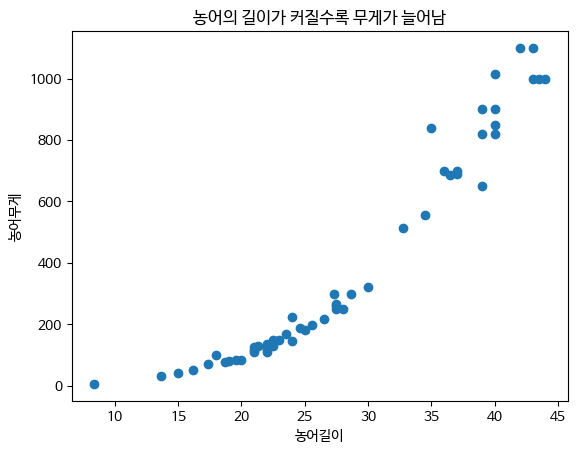

In [27]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')

plt.scatter(perch_length, perch_weight)
plt.xlabel('농어길이')
plt.ylabel('농어무게')
print('기초자료')
plt.title('농어의 길이가 커질수록 무게가 늘어남')
plt.show()

In [28]:
# k-최근접 이웃 알고리즘에서의 회귀 KNeighborsRegressor

# 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다
# 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측함
# k=3이라고 가정하면 2개의 다수가 있어 분류는 사각형으로 판단
# 회귀는 샘플에 가장 가까운 샘플 k개를 선택
# 타깃값 100, 80, 60을 더해 3으로 나눈 평균이 타겟 값으로 사용됨

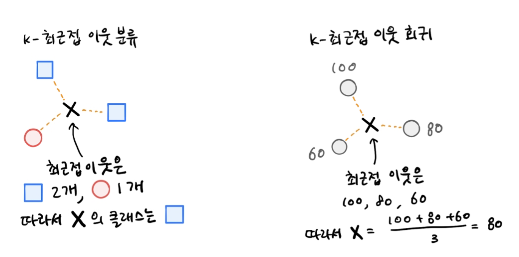

In [29]:
# 사이킷런에서 제공하는 훈련세트, 테스트세트 생성

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

# stratify 사용하지 않음

# 사이킷 런의train_test_split 함수를 사용해 훈련세트와 테스트 세트로 나눔
# random_state = 42 서로 같은 테스트를 위해 시드값 제공

# 사이킷 런에 사용할 훈련 세트는 2차원 배열을 사용함
# perch_length가 1차원 배열이기 때문에 이를 나눈 train_input과 test_input도 1차원 배열임
# [3,] => [3, 1] 2차원 배열을 사용해야 함으로 억지로 변환 reshape() 매서드 활용 (4,) -> (2,2)

In [30]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

# 현재는 1차원 배열로, 2차원 배열로 변환해야 함

(4,)


In [31]:
# 2차원 배열로 변환
test_array = test_array.reshape(2,2) # 강제로 2차원 열로 변환
print(test_array.shape)

# 전에는 2개의 특성으로 사용했었기 때문에 자연스럽게 열이 2개인 2차우너 배열을 사용했었지만
# 이번에는 특성이 1개로 수동으로 2차우너 배열을 만들어야 함 => np.reshpae()를 활용
# (4,) => (2,2) 크기로 바꿔줌

(2, 2)


In [32]:
print(test_array)

[[1 2]
 [3 4]]


In [33]:
# 입력 데이터인 train_input과 test_input을 2차원 배열로 바꿔야함
# train_input (42, ) => (42, 1) => train_input.reshape(42,1)
# 넘파이는 배열의 크기를 자동으로 지절하는 기능도 제공(-1)값을 넣으면 된다

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [34]:
print(train_input) # 전처리 끝

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [35]:
# 훈련시작
# 회귀 알고리즘용 클래스
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)
#       방어의 길이   방어의 무게

KNeighborsRegressor()

In [36]:
knr.score(test_input, test_target)

# 분류의 경우는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율 => 예측값
# 회귀인 경우에는 평가를 결정 계수라고함
# R^2 = 1 = ((타깃 - 예측)^2의 합) . (타깃 - 평균)^2의 합)임
# 타깃의 평균 정도를 예측하는 수준 => R^2는 0에 가까워지고, 예측이 타깃에 가까워지면
# 1에 가까운 결과 99.28%로 예측이 가능한 수준


0.992809406101064

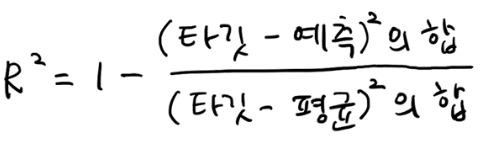

In [37]:
knr.predict([[15]]) # 기대 출력 15cm => 60g
# k최근접한 5개의 이웃에 대한 값을 99.28% 확률로 나온 결과(60g)

array([60.])

In [39]:
# sklearn.metrics 패키지 아래 여러가지 측정도구를 제공함
# mean_absolute_error, 절대값 오차를 평균하여 반환

from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측(prediction)
test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
#테스트 세트에 대한 평균 절대값 오차를 계산

print(mae)
# 19정도 타겟과 다르다

19.157142857142862


In [41]:
print(knr.score(train_input, train_target))
# 훈련한 점수를 평가해보면 96.98% 정도

0.9698823289099254


In [42]:
knr.score(test_input, test_target)
# 테스트 세트로 평가하면 99.26%

0.992809406101064

In [43]:
# 위 결과를 보면 모델을 훈련 세트에 훈련하면 훈련세트에 잘 맞는 모델이 만들어짐
# 이 모델을 훈련세트와 테스트 세트에서 평가하면 두 값 중에 어느 것이 높을까?

# 보통 훈련세트의 점수가 조금 더 높게 나옴
# 훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘면 과대 적합이라고 함
# 과소적합 : 훈련세트보다 테스트세트가 점수가 높아? 두 점수가 모두 낮은 경우

In [44]:
# 사이킷 런의 알고리즘 기본값을 3개로 조절

# 사이킷 런의 k최근접 이웃 기본값이 5인데 이것을 3으로 변경
# 이웃의 개수를 3개로 설정
knr.n_neighbors = 3

# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [45]:
knr.predict([[15]]) # 15cm => 47.3
# 5개의 이웃을 참고하는것 보다 3개를 참고하는 것이 더 좋은 결과가 나옴

array([47.33333333])

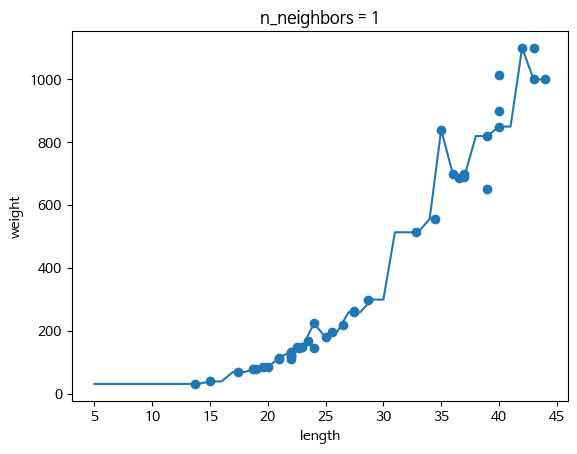

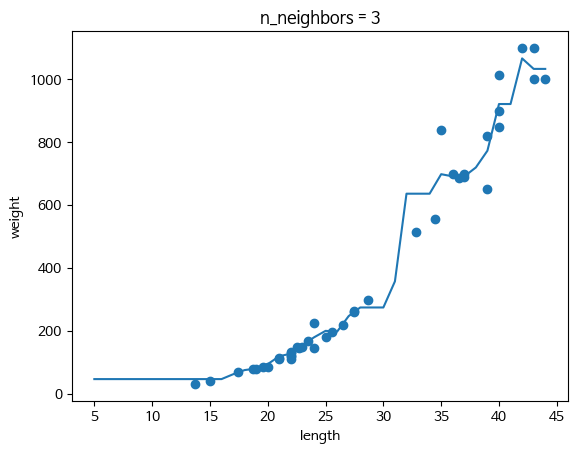

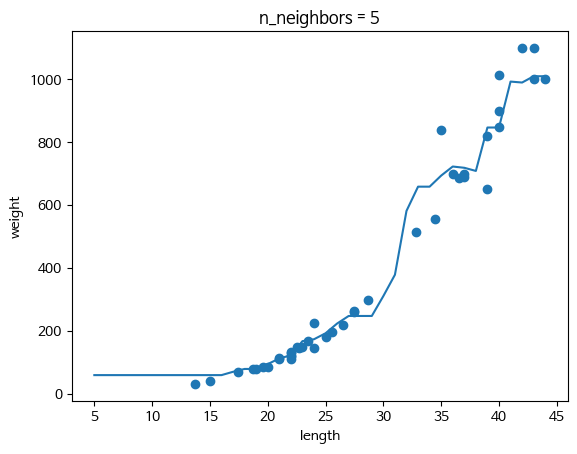

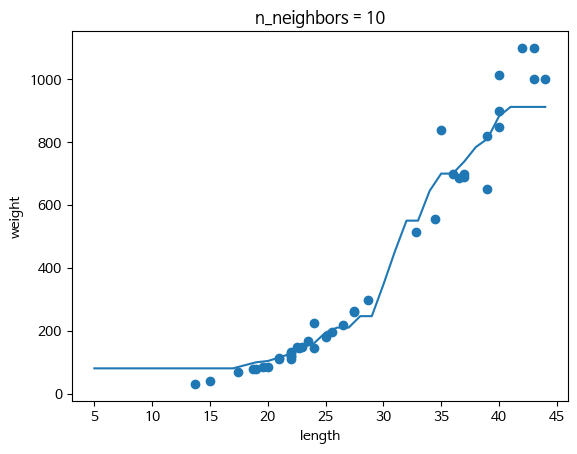

In [46]:
# 앞으로 훈련할때 하이퍼 파라미터(5 => 3 : 매개변수값) 변경으로 좋은 결과를 결정할 때 필수가 됨
# 이것을 보고서에 남겨서 선택한 결과를 표출해야함
# 그런데 이것을 사람이 값을 수동으로 바꿔가면서 훈련을 하면 시간 낭비가 될 수 있으므르 for문을 사용
# 하이퍼 파라미터 값은 대부분 홀수를 사용한다

knr = KNeighborsRegressor()
# 5에서 45까지 x좌푤르 생성
x = np.arange(5, 45).reshape(-1, 1)

# n = 1,3,5,10일때 예측 결과를 그래프로 그립니다
lst = [1,3,5,10]
for n in lst:
  #모델 훈련
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  # 지정한 범위 x에 대해 예측 구하기
  prediction = knr.predict(x)
  # 훈련 세트와 예측 결과 그래프 그리기
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'. format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()